# Projeto Prático 2 - Parte II

#### Alunos:
   - Bonifácio de Oliveira (bldof.eng16@uea.edu.br)
   - Luiz Fábio (lfba.lic17@uea.edu.br)
   - Luiz Felipe (lfda.lic17@uea.edu.br)
   - Rafaela Melo (rmf.lic16@uea.edu.br)

In [277]:
import numpy as np
import pandas as pd
from random import  uniform
import statistics
import matplotlib.pyplot as plt

# Classe do neurônio de Rosenblatt

In [278]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.100, .100),
            uniform(-1, 1),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
    
    def muda_pesos_iniciais(self,x1,x2,x3):
        self.pesos[0] = self.pesos[0]*x1
        self.pesos[1] = self.pesos[1]*x2
        self.pesos[2] = self.pesos[2]*x3

    def carrega_dados(self):
        dataset = np.fromfile('data1.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        #100 interações
        for i in range(100):
            if(self.perceptron() == False):
                self.epocas += 1
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        print("Média de ajustes feitos nos pesos: ",sum(self.total_de_ajustes)/len(self.total_de_ajustes))
        print("Desvio padrão de ajustes feitos nos pesos: ",statistics.stdev(self.total_de_ajustes))
        
        return self.epocas, sum(self.total_de_ajustes), sum(self.total_de_ajustes)/len(self.total_de_ajustes), statistics.stdev(self.total_de_ajustes)
        
n1 = Neuronio()
n2 = Neuronio()
n3 = Neuronio()
n4 = Neuronio()
n5 = Neuronio()
n6 = Neuronio()
n7 = Neuronio()
n8 = Neuronio()
n9 = Neuronio()

# 9 Configurações diferentes 
{0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}

In [279]:
n1.muda_pesos_iniciais(0.4 ,0.1 ,0.01)
n2.muda_pesos_iniciais(0.4 ,0.01, 0.1)
n3.muda_pesos_iniciais(0.4 ,0.4 , 0.4)
n4.muda_pesos_iniciais(0.1 ,0.4 ,0.01)
n5.muda_pesos_iniciais(0.1 ,0.01, 0.4)
n6.muda_pesos_iniciais(0.1 ,0.1 , 0.1)
n7.muda_pesos_iniciais(0.01,0.4 , 0.1)
n8.muda_pesos_iniciais(0.01,0.1 , 0.4)
n9.muda_pesos_iniciais(0.01,0.01,0.01)

# Treino de cada configuração

In [280]:
epocas = []
total_ajustes = []
media_ajustes = []
desvio_padrao = []

In [281]:
x, y, z, i = n1.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  34
Total de ajustes feitos nos pesos:  10892
Média de ajustes feitos nos pesos:  320.3529411764706
Desvio padrão de ajustes feitos nos pesos:  155.02333790148387


In [282]:
x, y, z, i = n2.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  23
Total de ajustes feitos nos pesos:  7154
Média de ajustes feitos nos pesos:  311.04347826086956
Desvio padrão de ajustes feitos nos pesos:  165.18129936551247


In [283]:
x, y, z, i = n3.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  40
Total de ajustes feitos nos pesos:  12564
Média de ajustes feitos nos pesos:  314.1
Desvio padrão de ajustes feitos nos pesos:  159.51011542556455


In [284]:
x, y, z, i = n4.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  60
Total de ajustes feitos nos pesos:  19631
Média de ajustes feitos nos pesos:  327.18333333333334
Desvio padrão de ajustes feitos nos pesos:  144.30528980833193


In [285]:
x, y, z, i = n5.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  23
Total de ajustes feitos nos pesos:  7147
Média de ajustes feitos nos pesos:  310.7391304347826
Desvio padrão de ajustes feitos nos pesos:  165.8167711090397


In [286]:
x, y, z, i = n6.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  43
Total de ajustes feitos nos pesos:  13776
Média de ajustes feitos nos pesos:  320.3720930232558
Desvio padrão de ajustes feitos nos pesos:  149.40103003020553


In [287]:
x, y, z, i = n7.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  16
Total de ajustes feitos nos pesos:  4697
Média de ajustes feitos nos pesos:  293.5625
Desvio padrão de ajustes feitos nos pesos:  185.34723044419448


In [288]:
x, y, z, i = n8.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  38
Total de ajustes feitos nos pesos:  12377
Média de ajustes feitos nos pesos:  325.7105263157895
Desvio padrão de ajustes feitos nos pesos:  148.26472086700045


In [289]:
x, y, z, i = n9.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  45
Total de ajustes feitos nos pesos:  14551
Média de ajustes feitos nos pesos:  323.35555555555555
Desvio padrão de ajustes feitos nos pesos:  148.5430998910839


# Gráfico de cada configuração

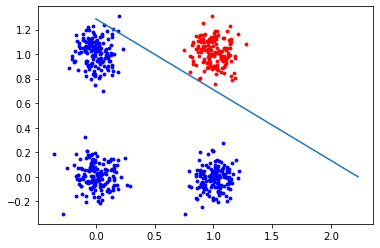

In [290]:
n1.mostra_grafico()

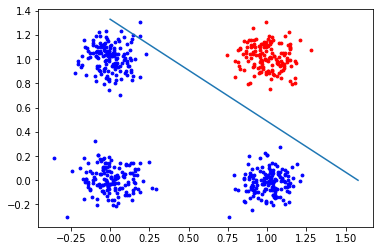

In [291]:
n2.mostra_grafico()

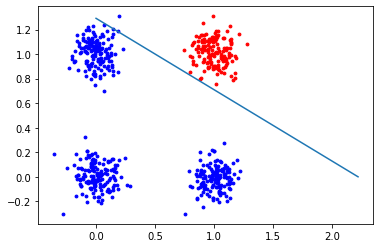

In [292]:
n3.mostra_grafico()

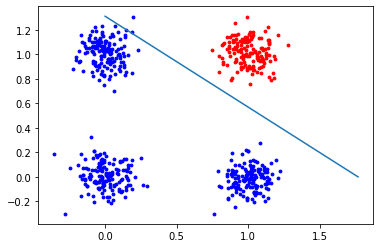

In [293]:
n4.mostra_grafico()

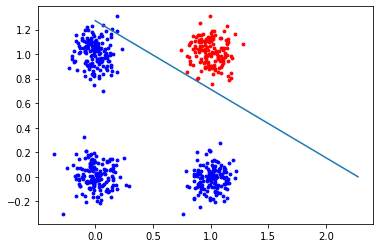

In [294]:
n5.mostra_grafico()

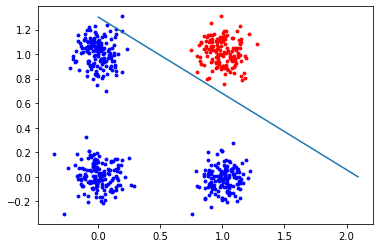

In [295]:
n6.mostra_grafico()

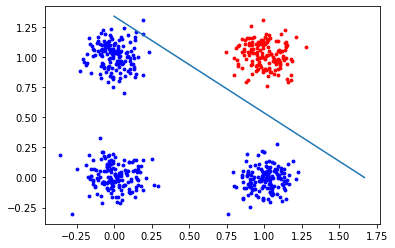

In [296]:
n7.mostra_grafico()

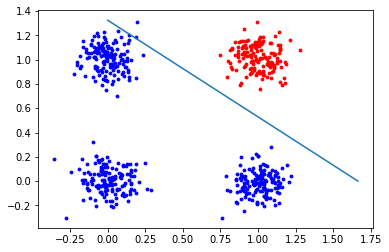

In [297]:
n8.mostra_grafico()

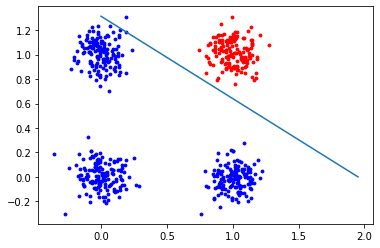

In [298]:
n9.mostra_grafico()

# Tabela com a comparação da média e desvio padrão das 9 configurações

In [301]:
from prettytable import PrettyTable
dat_dtype = {
    'names' : ('Configuração', 'Épocas', 'Total Ajustes', 'Média Ajustes', 'Desvio Padrão'),
    'formats' : ('i', 'i', 'i', 'd', 'd')}

dat = np.zeros(9, dat_dtype)

f = [1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 0

while i < 9:
    dat['Configuração'][i] = f[i]
    dat['Épocas'][i] = epocas[i]
    dat['Total Ajustes'][i] = total_ajustes[i]
    dat['Média Ajustes'][i] = media_ajustes[i]
    dat['Desvio Padrão'][i] = desvio_padrao[i]
    
    i+=1

x = PrettyTable(dat.dtype.names)

for row in dat:
    x.add_row(row)

In [302]:
print(x)

+--------------+--------+---------------+--------------------+--------------------+
| Configuração | Épocas | Total Ajustes |   Média Ajustes    |   Desvio Padrão    |
+--------------+--------+---------------+--------------------+--------------------+
|      1       |   34   |     10892     | 320.3529411764706  | 155.02333790148387 |
|      2       |   23   |      7154     | 311.04347826086956 | 165.18129936551247 |
|      3       |   40   |     12564     |       314.1        | 159.51011542556455 |
|      4       |   60   |     19631     | 327.18333333333334 | 144.30528980833193 |
|      5       |   23   |      7147     | 310.7391304347826  | 165.8167711090397  |
|      6       |   43   |     13776     | 320.3720930232558  | 149.40103003020553 |
|      7       |   16   |      4697     |      293.5625      | 185.34723044419448 |
|      8       |   38   |     12377     | 325.7105263157895  | 148.26472086700045 |
|      9       |   45   |     14551     | 323.35555555555555 | 148.543099891

A partir da Tabela podemos ver que a configuração 7 teve o menor número de épocas, menor total de ajustes de pesos, menor média de ajustes de pesos e o maior desvio padrão.